In [1]:
#import pandas library
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df

df= pd.read_csv("Fake_Real_Data.csv")

#print top 5 rows

df.head(5)

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df.shape

(9900, 2)

In [3]:
#check the distribution of labels 

df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [4]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num']= df['label'].map({'Fake':0 ,'Real':1})


#check the results with top 5 rows

df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


#### Modelling without Pre-processing Text data

In [5]:
#import train-test-split from sklearn 

from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test= train_test_split(df['Text'], df['label_num'], random_state=2022, stratify=df.label_num)

In [6]:
#print the shapes of X_train and X_test

X_train.shape, X_test.shape

((7425,), (2475,))

Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
print the classification report.

In [7]:
#1. create a pipeline object

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf= Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric = 'euclidean'))
])

#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,clf.predict(X_test) ))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64      1250
           1       0.65      0.98      0.78      1225

    accuracy                           0.73      2475
   macro avg       0.81      0.73      0.71      2475
weighted avg       0.81      0.73      0.71      2475



Attempt 2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
print the classification report.

In [8]:
#1. create a pipeline object

clf= Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])



#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred

clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,clf.predict(X_test) ))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1250
           1       0.69      1.00      0.81      1225

    accuracy                           0.77      2475
   macro avg       0.84      0.78      0.76      2475
weighted avg       0.84      0.77      0.76      2475



Attempt 3 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [9]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object

clf= Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('RFC', RandomForestClassifier())
])
#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred


y_pred=clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1250
           1       0.98      1.00      0.99      1225

    accuracy                           0.99      2475
   macro avg       0.99      0.99      0.99      2475
weighted avg       0.99      0.99      0.99      2475



Attempt 4 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with both unigram and bigrams.
use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
print the classification report.

In [10]:
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object

clf= Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('NB', MultinomialNB())
])
#2. fit with X_train and y_train

clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred


y_pred=clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1250
           1       0.99      0.99      0.99      1225

    accuracy                           0.99      2475
   macro avg       0.99      0.99      0.99      2475
weighted avg       0.99      0.99      0.99      2475



##### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [16]:
import spacy

nlp= spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    filtered_token=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [17]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data

df['preprocessed_txt']=df['Text'].apply(preprocess)
# this will take some time, please be patient

In [18]:
#print the top 5 rows
df.head(5)

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


###### Build a model with pre processed text

Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting


In [20]:
X_train, X_test, y_train, y_test= train_test_split(df.preprocessed_txt, df.label_num, random_state=2022, stratify=df.label_num)

Let's check the scores with our best model till now

Random Forest
Attempt1 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [21]:
clf= Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('random_forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1250
           1       0.99      0.93      0.96      1225

    accuracy                           0.96      2475
   macro avg       0.96      0.96      0.96      2475
weighted avg       0.96      0.96      0.96      2475



Attempt2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, bigram, and trigrams.
use RandomForest as the classifier.
print the classification report.

In [22]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1250
           1       1.00      0.99      1.00      1225

    accuracy                           1.00      2475
   macro avg       1.00      1.00      1.00      2475
weighted avg       1.00      1.00      1.00      2475



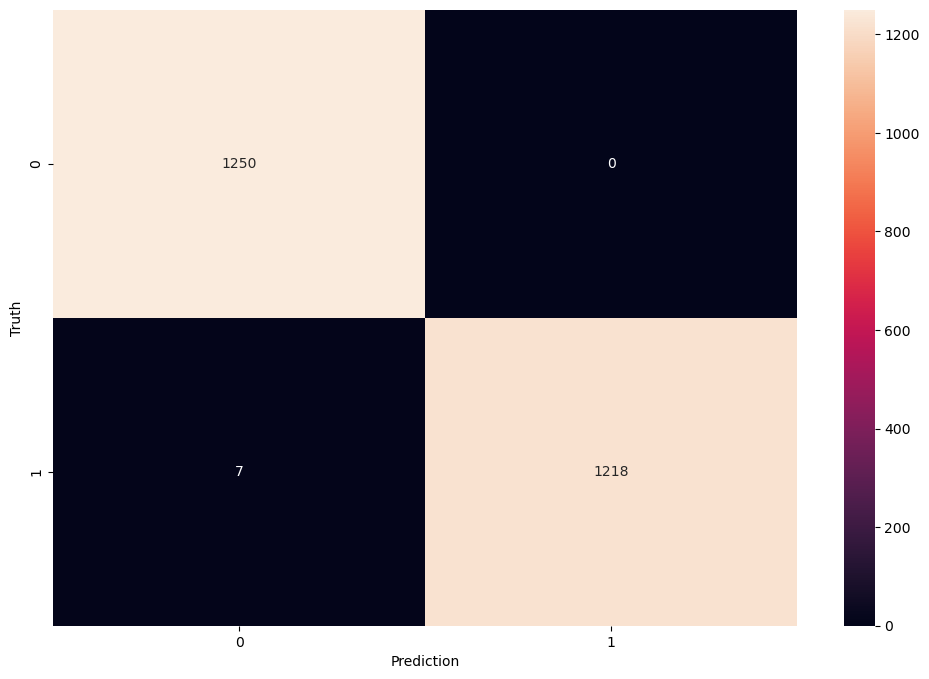

In [24]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm= confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize=(12,8))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

